In [127]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sb

In [128]:
bMart = pd.read_csv("Assignment1_BigMart_Data.csv")

In [129]:
bMart.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [130]:
bMart.shape

(8523, 12)

In [131]:
bMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [132]:
bMart.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### Finding unique values

In [133]:
bMart.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Replacing nulls in specific columns

In [134]:
bMart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [135]:
null_data = bMart[bMart.isnull().any(axis=1)]
null_data.shape

(3873, 12)

In [136]:
null_data.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
2003           DRL35        15.70          Low Fat         0.030766   
6471           FDB52        17.75          low fat         0.030497   
5133           FDW31        11.35              reg         0.043402   
7802           FDO57        20.75          Low Fat         0.108931   
3445           NCH06        12.30          Low Fat         0.076987   

                  Item_Type  Item_MRP Outlet_Identifier  \
2003            Hard Drinks   43.2770            OUT045   
6471                  Dairy  256.9672            OUT045   
5133  Fruits and Vegetables  197.0742            OUT017   
7802            Snack Foods  160.9578            OUT045   
3445              Household  247.9460            OUT017   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
2003                       2002         NaN               Tier 2   
6471                       2002         NaN               Tier 2   
5133                       2007         NaN               Tier 2   
7802                       2002         NaN               Tier 2   
3445                       2007         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
2003  Supermarket Type1           649.1550  
6471  Supermarket Type1          1534.0032  
5133  Supermarket Type1          2587.9646  
7802  Supermarket Type1          1444.1202  
3445  Supermarket Type1          3202.4980

### impute weight column 

In [137]:
#this will aggregate the the weight based on the id
group_by_id_weight = bMart.pivot_table(index= ['Item_Identifier'],values=['Item_Weight'], aggfunc=(lambda x: np.nanmean(x)))
group_by_id_weight.sample(5)

C:\Users\M_A\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

Mean of empty slice



Item_Weight
Item_Identifier             
DRG39                 14.150
FDO15                 16.750
FDD41                  6.765
NCA41                 16.750
FDP15                 15.200

    np.nanmean used to avoid distorting the mean value (due to the presence of zero)

In [138]:
display((group_by_id_weight.loc[group_by_id_weight.Item_Weight == 0]).count())
display(group_by_id_weight.Item_Weight.isnull().count())

Item_Weight    0
dtype: int64

1555

In [139]:
display(group_by_id_weight.shape)
display(len(bMart.Item_Identifier.unique()))

(1555, 1)

1559

In [140]:
# bMart.loc[mV,'Item_Weight'] = bMart.loc[mV,'Item_Identifier'].apply(lambda x: group_by_id_weight[x])

bMart['Item_Weight'] = bMart['Item_Identifier'].map(group_by_id_weight['Item_Weight'])


In [141]:
bMart.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
984            FDF34        9.300          Regular         0.014077   
8139           FDI02       15.700          Regular         0.115032   
5585           FDY02        8.945          Regular         0.088003   
6233           FDB60        9.300          Low Fat         0.028566   
7398           FDB04       11.350          Regular         0.063174   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
984    Snack Foods  200.0084            OUT018                       2009   
8139        Canned  114.1202            OUT018                       2009   
5585         Dairy  261.3910            OUT018                       2009   
6233  Baking Goods  193.0136            OUT049                       1999   
7398         Dairy   86.1856            OUT013                       1987   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
984       Medium               Tier 3  Supermarket Type2          2182.4924  
8139      Medium               Tier 3  Supermarket Type2           787.6414  
5585      Medium               Tier 3  Supermarket Type2          1840.9370  
6233      Medium               Tier 1  Supermarket Type1          4860.3400  
7398        High               Tier 3  Supermarket Type1          1494.0552

In [142]:
bMart[bMart['Item_Weight'].isnull()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods   86.9198            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
4187         Dairy   88.9514            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
927       Medium               Tier 3  Supermarket Type3          1569.9564  
1922      Medium               Tier 3  Supermarket Type3          4434.2280  
4187      Medium               Tier 3  Supermarket Type3          3453.5046  
5022       Small               Tier 1      Grocery Store           120.5098

    this means NaNs remain because they are the only product hence no aggregaration can be applied 
    
    allocat the mean item_weight column for each of them

In [143]:
bMart.Item_Weight.fillna(bMart.Item_Weight.mean(), inplace=True)

In [144]:
bMart[bMart['Item_Weight'].isnull()]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

In [145]:
bMart['Item_Weight'].unique()[0:10]

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 , 19.   ,
       16.2  , 11.8  ])

    no zeros and nulls remain. all nulls were either replaced by the same product weight or the general mean.

### impute outlet_size column

    There is relation between the size of the supermarket and type 

    ill put the most common outlet size based on the outlet type

    *may change way of filling nans*

In [146]:
bMart['Outlet_Size'].isnull().sum()

2410

In [147]:
#find mode for each column?
common_size_for_type = bMart.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: mode(x.astype('str'),nan_policy='omit').mode[0]))

C:\Users\M_A\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



In [148]:
common_size_for_type

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

                                                                                                                                           the most common size for grocery store is nan, supermarket type1 is small, supermarket type1 is medium, supermarket    type1 is medium

    Since grocery store's most common size is nan, this will replace it in dataframe as nan. must chnage.

In [149]:
bMart.groupby(["Outlet_Size", "Outlet_Type"]).size()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type1     930
             Supermarket Type2     928
             Supermarket Type3     935
Small        Grocery Store         528
             Supermarket Type1    1860
dtype: int64

    now grocery store's most common size is small, disregarding nan. 

    change the grocery store column in mode table to small

In [150]:
common_size_for_type['Grocery Store'] = "Small"

In [151]:
#same as filling weight nans
#now the missng value for outlet type 
mV_size = bMart['Outlet_Size'].isnull()

bMart.loc[mV_size,'Outlet_Size'] = bMart.loc[mV_size,'Outlet_Type'].apply(lambda x: common_size_for_type[x])

In [152]:
bMart['Outlet_Size'].isnull().sum()

0

### Replace values with same identifier 


In [153]:
cols_values = bMart["Item_Fat_Content"].values.ravel()

pd.unique(cols_values)

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [154]:
toReplace = {'low fat' : 'Low Fat','LF' : 'Low Fat','reg' : 'Regular'}

bMart["Item_Fat_Content"] = bMart["Item_Fat_Content"].replace(toReplace)

In [155]:
pd.unique(cols_values)

array(['Low Fat', 'Regular'], dtype=object)

In [156]:
bMart.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1730           FDY28         7.47          Regular         0.153012   
6713           FDC53         8.68          Low Fat         0.008834   
5979           FDI32        17.70          Low Fat         0.174645   
8054           NCZ29        15.00          Low Fat         0.119461   
160            FDM22        14.00          Regular         0.041923   

                  Item_Type  Item_MRP Outlet_Identifier  \
1730           Frozen Foods  215.2218            OUT017   
6713           Frozen Foods  100.0384            OUT035   
5979  Fruits and Vegetables  113.2834            OUT049   
8054     Health and Hygiene  126.3362            OUT010   
160             Snack Foods   54.7640            OUT013   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1730                       2007       Small               Tier 2   
6713                       2004       Small               Tier 2   
5979                       1999      Medium               Tier 1   
8054                       1998       Small               Tier 3   
160                        1987        High               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
1730  Supermarket Type1          3419.5488  
6713  Supermarket Type1          2266.3832  
5979  Supermarket Type1          1727.7510  
8054      Grocery Store           503.3448  
160   Supermarket Type1          1331.6000

### adjust item_visibility 

                                                                                                                                                    according to some sources on the internet, the visibilty should not be zero. so they impute the zero with the avg column value. 
                                                                                                                                 according to the hypothesis:
         
                                                                                                                             "Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more."
         that means that zero visibilty is appropriate 

In [157]:
#group_by_vis = bMart.pivot_table(index= ['Item_Identifier'],values=['Item_Visibility'], aggfunc=(lambda x: np.nanmean(x)))
#group_by_vis.sample(10)

In [158]:
#display((group_by_vis.loc[group_by_vis.Item_Visibility == 0]).count())
#display(group_by_vis.Item_Visibility.isnull().count())

In [159]:
#bMart['Item_Visibility'] = bMart['Item_Identifier'].map(group_by_vis['Item_Visibility'])

In [160]:
#bMart[bMart['Item_Visibility'] == 0]

In [161]:
#bMart['Item_Visibility'].unique()

In [162]:
#bMart

### Create new column for general categories (parsed from Item_Identifier)

    according to the product level hypothesis, the first 2 characters in item_identifiers signify the following:
                                                    FD : Food
                                                    DR : Drink
                                                    NC : Non-Consumable

In [163]:
# bMart["Item_Category"] = bMart.Item_Identifier.str[0:2]

In [164]:
# bMart.sample(10)

     instead of abrev, change to full name

In [165]:
# toReplaceItemCat = {'FD':'Food', 'NC':'Non-Consumable','DR':'Drink'}

# bMart['Item_Category'] = bMart['Item_Category'].map(toReplaceItemCat)

In [166]:
# bMart.sample(5)

### Convert item weight to two decimal places

    uniform weight values. some are more than 2 decimal places 

In [167]:
bMart['Item_Weight'] = bMart['Item_Weight'].apply(lambda x:round(x,2))

In [168]:
bMart['Item_Weight'].sample(10)

6342    13.60
1264    19.10
7315     5.92
1957    13.10
5281    14.50
4230    18.85
7835     6.63
1342    15.50
7812    17.75
4605    17.85
Name: Item_Weight, dtype: float64

In [169]:
bMart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# saved file

In [170]:
#bMart.to_csv('Cleaned_Assignment1_BigMart_Data.csv')

# Visual

In [171]:
import plotly.offline as pyo
import plotly.express as px
pyo.init_notebook_mode()

import matplotlib.pyplot as plt

##  sales X outlet

In [172]:
px.box(bMart, x="Outlet_Type", y="Item_Outlet_Sales", color= 'Item_Type', notched=True)

In [173]:
px.box(bMart,x='Item_Type', y='Item_Outlet_Sales')

In [174]:
px.box(bMart, x="Outlet_Type", y="Item_Outlet_Sales", notched=True)

## Location type X sales

In [175]:
px.box(bMart, x="Outlet_Location_Type", y="Item_Outlet_Sales")

## Outlet size X sales


In [176]:
px.box(bMart, x="Outlet_Size", y="Item_Outlet_Sales", notched=True)
 

## est year X Sales

In [177]:
avg_sale_per_year = bMart.pivot_table(index= ['Outlet_Establishment_Year'],values=['Item_Outlet_Sales'], aggfunc=(lambda x: np.sum(x)))
avg_sale_per_year

Item_Outlet_Sales
Outlet_Establishment_Year                   
1985                            3.633620e+06
1987                            2.142664e+06
1997                            2.118395e+06
1998                            1.883402e+05
1999                            2.183970e+06
2002                            2.036725e+06
2004                            2.268123e+06
2007                            2.167465e+06
2009                            1.851823e+06

In [178]:
px.line(avg_sale_per_year, x=avg_sale_per_year.index, y="Item_Outlet_Sales", hover_name="Item_Outlet_Sales") 

## Fat content / outlet type + size X sales

In [179]:
avg_sale_per_fat_content = bMart.pivot_table(index= ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Size'],values=['Item_Outlet_Sales'], aggfunc=(lambda x: np.sum(x)))
avg_sale_per_fat_content.reset_index(inplace=True)
avg_sale_per_fat_content.head()

Item_Fat_Content        Outlet_Type Outlet_Size  Item_Outlet_Sales
0          Low Fat      Grocery Store       Small       2.406814e+05
1          Low Fat  Supermarket Type1        High       1.410001e+06
2          Low Fat  Supermarket Type1      Medium       1.390523e+06
3          Low Fat  Supermarket Type1       Small       5.456997e+06
4          Low Fat  Supermarket Type2      Medium       1.201305e+06

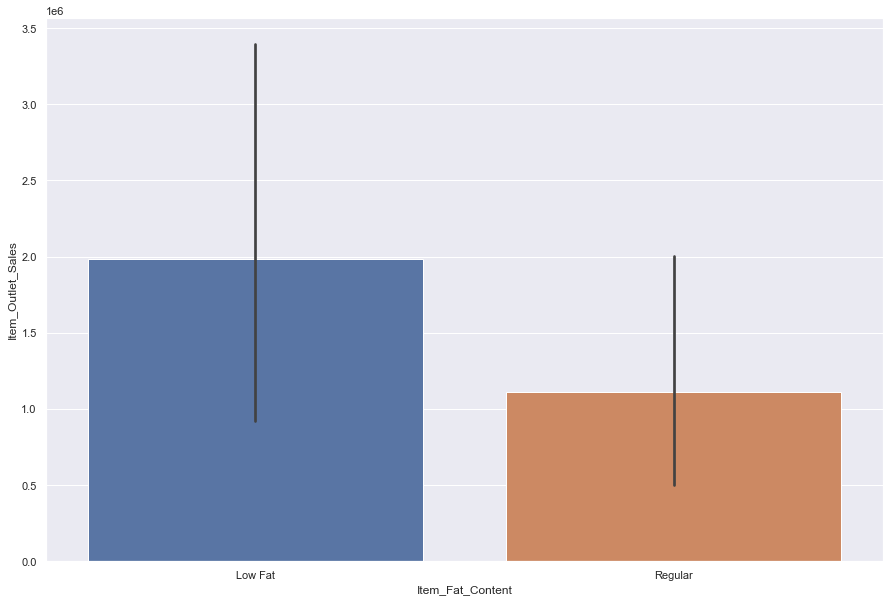

In [180]:
sb.barplot(x=avg_sale_per_fat_content.Item_Fat_Content, y=avg_sale_per_fat_content.Item_Outlet_Sales)

    we see that there is more low fat products sold 

In [181]:
px.bar(avg_sale_per_fat_content, x='Outlet_Type', y='Item_Outlet_Sales', color = 'Item_Fat_Content',barmode='group')

    here is a comparison of total sales between fat content for each supermarket. 

In [182]:
px.bar(avg_sale_per_fat_content, x='Outlet_Size', y='Item_Outlet_Sales', color = 'Item_Fat_Content',barmode='group')

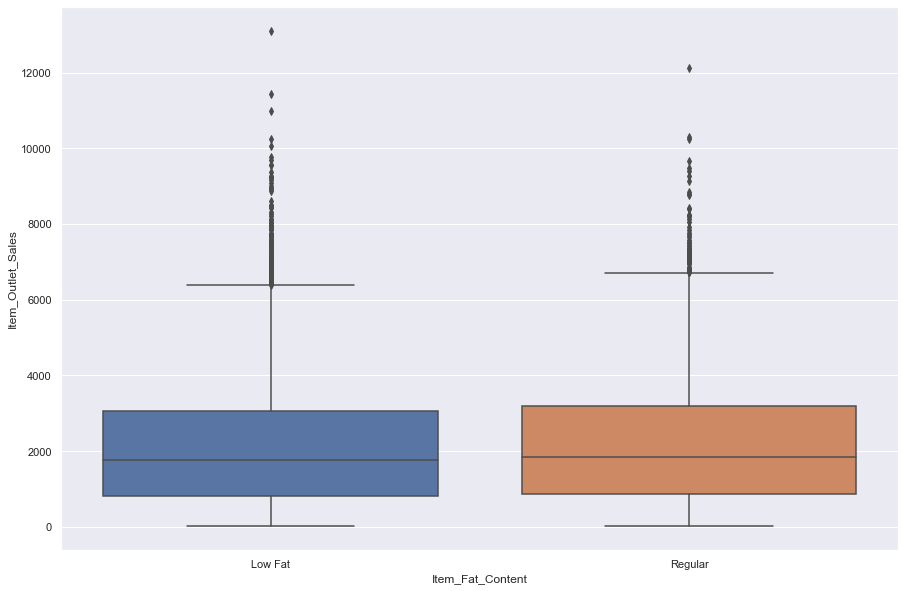

In [183]:
sb.boxplot(bMart.Item_Fat_Content, bMart.Item_Outlet_Sales)

In [184]:
fat_content_pers=pd.crosstab(bMart['Outlet_Size'],bMart['Item_Fat_Content'])
fat_content_pers

Item_Fat_Content  Low Fat  Regular
Outlet_Size                       
High                  606      326
Medium               1799      994
Small                3112     1686

    comparison of total sales between fat content for each size of supermarket.

# Stat tests

In [185]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols

In [186]:
bMart.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

## testing Item type (Categ vs numerical)

In [187]:
model = ols("Item_Outlet_Sales ~ Item_Type", bMart).fit()

In [188]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.701
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           0.000388
Time:                        16:28:50   Log-Likelihood:                -75503.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8507   BIC:                         1.512e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1952.9712     66.938     29.176      0.000    1821.757    2084.185
Item_Type[T.Breads]                  251.1610    126.681      1.983      0.047       2.835     499.487
Item_Type[T.Breakfast]               158.8374    175.715      0.904      0.366    -185.606     503.281
Item_Type[T.Canned]                  272.2237     94.627      2.877      0.004      86.731     457.717
Item_Type[T.Dairy]                   279.5714     93.477      2.991      0.003      96.334     462.808
Item_Type[T.Frozen Foods]            179.8965     88.727      2.028      0.043       5.970     353.823
Item_Type[T.Fruits and Vegetables]   336.0384     82.688      4.064      0.000     173.950     498.127
Item_Type[T.Hard Drinks]             186.2504    134.343      1.386      0.166     -77.095     449.596
Item_Type[T.Health and Hygiene]       57.0291    100.320      0.568      0.570    -139.623     253.681
Item_Type[T.Household]               305.8131     87.586      3.492      0.000     134.124     477.502
Item_Type[T.Meat]                    206.0067    106.359      1.937      0.053      -2.483     414.497
Item_Type[T.Others]                  -26.8315    147.176     -0.182      0.855    -315.332     261.669
Item_Type[T.Seafood]                 373.0947    223.264      1.671      0.095     -64.558     810.747
Item_Type[T.Snack Foods]             324.3505     83.067      3.905      0.000     161.518     487.183
Item_Type[T.Soft Drinks]              53.5405    104.906      0.510      0.610    -152.100     259.181
Item_Type[T.Starchy Foods]           421.3616    155.237      2.714      0.007     117.059     725.664
==============================================================================
Omnibus:                     1577.249   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2854.882
Skew:                           1.170   Prob(JB):                         0.00
Kurtosis:                       4.602   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    We see that some item types corelate with the amount of sales

## testing Item Identifiers (Categ vs numerical)

In [206]:
model = ols("Item_Outlet_Sales ~ Item_Identifier", bMart).fit()
#model.summary()

    We see that the f-value is significant, hence there is an overall trend between the item and sales.

## testing Item_Fat_Content (Categ vs numerical)

In [190]:
model = ols("Item_Outlet_Sales ~ Item_Fat_Content", bMart).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.987
Date:                Wed, 29 Apr 2020   Prob (F-statistic):             0.0840
Time:                        16:28:55   Log-Likelihood:                -75521.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8521   BIC:                         1.511e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    2157.7115     22.972     93.927      0.000    2112.680    2202.743
Item_Fat_Content[T.Regular]    66.8496     38.682      1.728      0.084      -8.976     142.675
==============================================================================
Omnibus:                     1592.405   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.868
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## testing Outlet_Location_Type (Categ vs numerical)

In [191]:
model = ols("Item_Outlet_Sales ~ Outlet_Location_Type", bMart).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     53.95
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           5.22e-24
Time:                        16:28:56   Log-Likelihood:                -75469.
No. Observations:                8523   AIC:                         1.509e+05
Df Residuals:                    8520   BIC:                         1.510e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1876.9092     34.706     54.080      0.000    1808.877    1944.942
Outlet_Location_Type[T.Tier 2]   447.0814     47.301      9.452      0.000     354.361     539.802
Outlet_Location_Type[T.Tier 3]   402.7185     45.422      8.866      0.000     313.681     491.756
==============================================================================
Omnibus:                     1583.737   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2861.320
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                       4.590   Cond. No.                         4.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
#sb.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=avg_sale_oulet_type)

## Testing Outlet_Type (Categ vs numerical)

In [193]:
model = ols("Item_Outlet_Sales ~ Outlet_Type", bMart).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     894.7
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:28:56   Log-Likelihood:                -74356.
No. Observations:                8523   AIC:                         1.487e+05
Df Residuals:                    8519   BIC:                         1.487e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          339.8285     45.227      7.514      0.000     251.173     428.484
Outlet_Type[T.Supermarket Type1]  1976.3526     49.423     39.988      0.000    1879.471    2073.235
Outlet_Type[T.Supermarket Type2]  1655.6702     66.578     24.868      0.000    1525.162    1786.179
Outlet_Type[T.Supermarket Type3]  3354.2101     66.443     50.482      0.000    3223.965    3484.455
==============================================================================
Omnibus:                     1492.835   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2842.009
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       4.822   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Testing Outlet_Size (Categ vs numerical)

In [194]:
model = ols("Item_Outlet_Sales ~ Outlet_Size", bMart).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     213.7
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           2.80e-91
Time:                        16:28:56   Log-Likelihood:                -75314.
No. Observations:                8523   AIC:                         1.506e+05
Df Residuals:                    8520   BIC:                         1.507e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2298.9953     54.553     42.142      0.000    2192.058    2405.933
Outlet_Size[T.Medium]   382.6083     63.001      6.073      0.000     259.111     506.106
Outlet_Size[T.Small]   -431.8124     59.617     -7.243      0.000    -548.676    -314.949
==============================================================================
Omnibus:                     1540.631   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2723.430
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       4.515   Cond. No.                         6.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## testing item visibilty

Item_Outlet_Sales
Item_Visibility                   
0.024201                 2175.8344
0.052791                  591.2304
0.191501                  120.5098
0.081527                 1843.6002
0.034957                 2854.9504

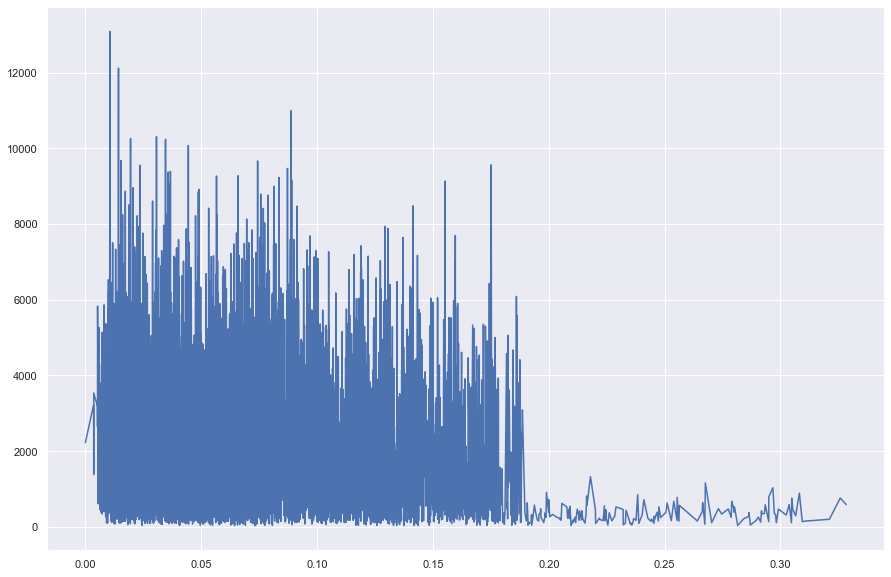

In [195]:
avg_sale_visible = bMart.pivot_table(index= ['Item_Visibility'],values=['Item_Outlet_Sales'], aggfunc=(lambda x: np.mean(x)))
display(avg_sale_visible.sample(5))
plt.plot(avg_sale_visible.index, avg_sale_visible.Item_Outlet_Sales)

In [196]:
corr_vis, _ = pearsonr(bMart.Item_Outlet_Sales, bMart.Item_Visibility)
print('Pearsons correlation: %.3f' % corr_vis)

Pearsons correlation: -0.129


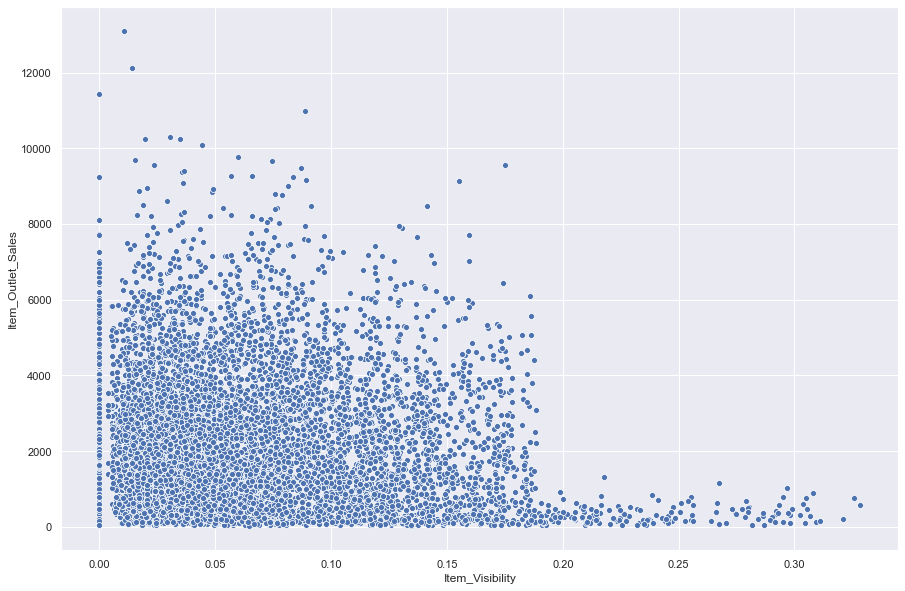

In [197]:

sb.scatterplot(bMart.Item_Visibility, bMart.Item_Outlet_Sales, data = bMart)

## item retail price

In [198]:
corr_MRP, _ = pearsonr(bMart.Item_Outlet_Sales, bMart.Item_MRP)
print('Pearsons correlation: %.3f' % corr_MRP)

Pearsons correlation: 0.568


Item_Outlet_Sales
Item_MRP                   
191.3846          2675.1844
81.6592           1403.5064
156.1288          2828.3184
123.0072          1960.1152
123.9072          1102.5648

<BarContainer object of 5938 artists>

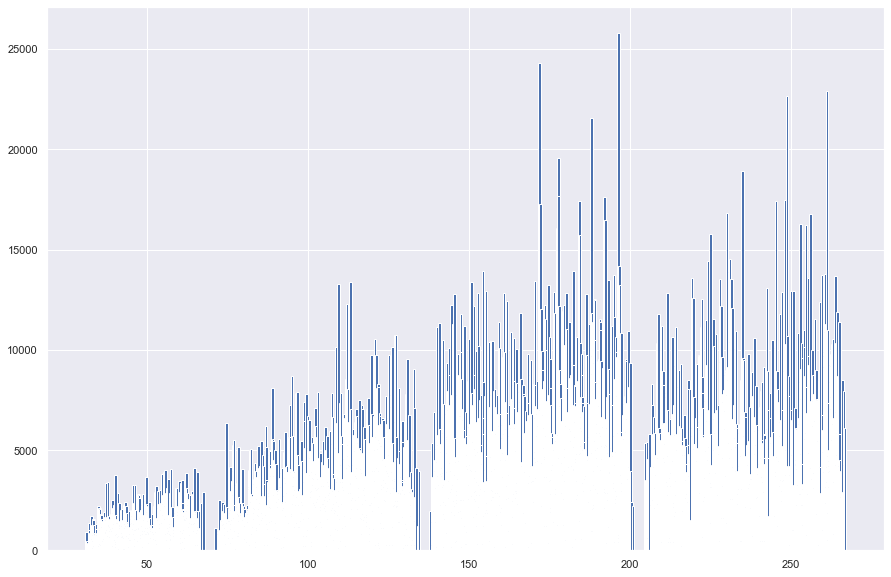

In [199]:
avg_retail = bMart.pivot_table(index= ['Item_MRP'],values=['Item_Outlet_Sales'], aggfunc=(lambda x: np.sum (x)))
display(avg_retail.sample(5))
plt.bar(avg_retail.index, avg_retail.Item_Outlet_Sales)

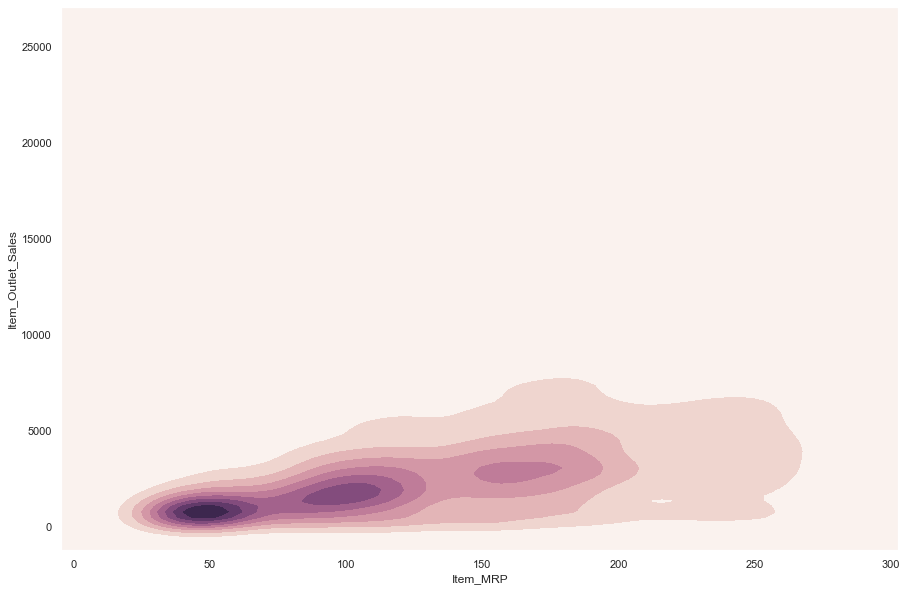

In [200]:
cmap = sb.cubehelix_palette(light=1, as_cmap=True)
sb.kdeplot(avg_retail.index, avg_retail.Item_Outlet_Sales, shade=True, cmap = cmap)

## Item weight x Item sales

In [201]:
corr_weight, _ = pearsonr(bMart.Item_Outlet_Sales, bMart.Item_Weight)
corr_weight

0.013164570019407061

## outlet est year X sales

In [202]:
avg_sale_est = bMart.pivot_table(index= ['Outlet_Establishment_Year'],values=['Item_Outlet_Sales'], aggfunc=(lambda x: np.mean(x)))
display(avg_sale_est.head(10))

Item_Outlet_Sales
Outlet_Establishment_Year                   
1985                             2483.677474
1987                             2298.995256
1997                             2277.844267
1998                              339.351662
1999                             2348.354635
2002                             2192.384798
2004                             2438.841866
2007                             2340.675263
2009                             1995.498739

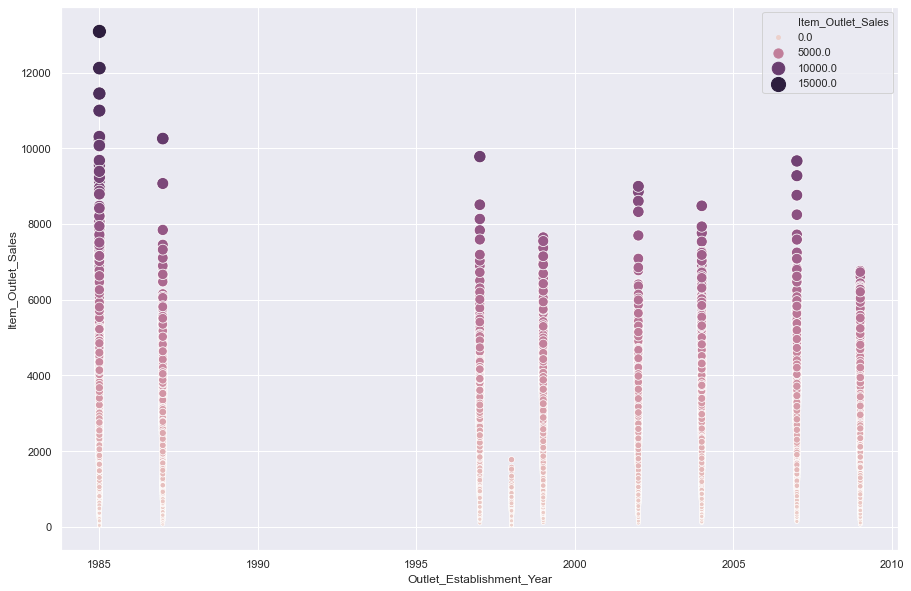

In [203]:
sb.scatterplot(bMart.Outlet_Establishment_Year,'Item_Outlet_Sales',hue="Item_Outlet_Sales", size = "Item_Outlet_Sales", sizes=(15,200),  data= bMart )

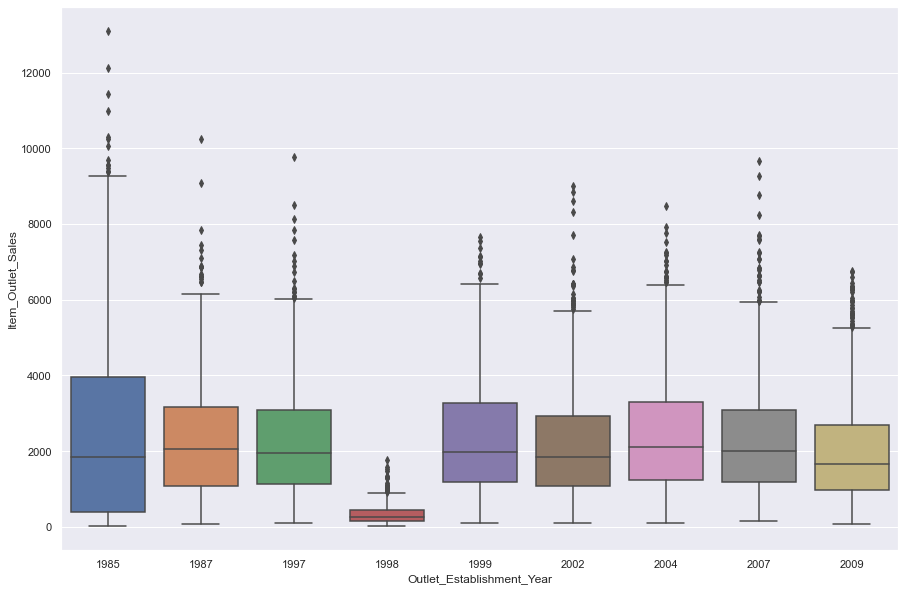

In [204]:
sb.set(rc={'figure.figsize':(15,10)})
sb.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=bMart)

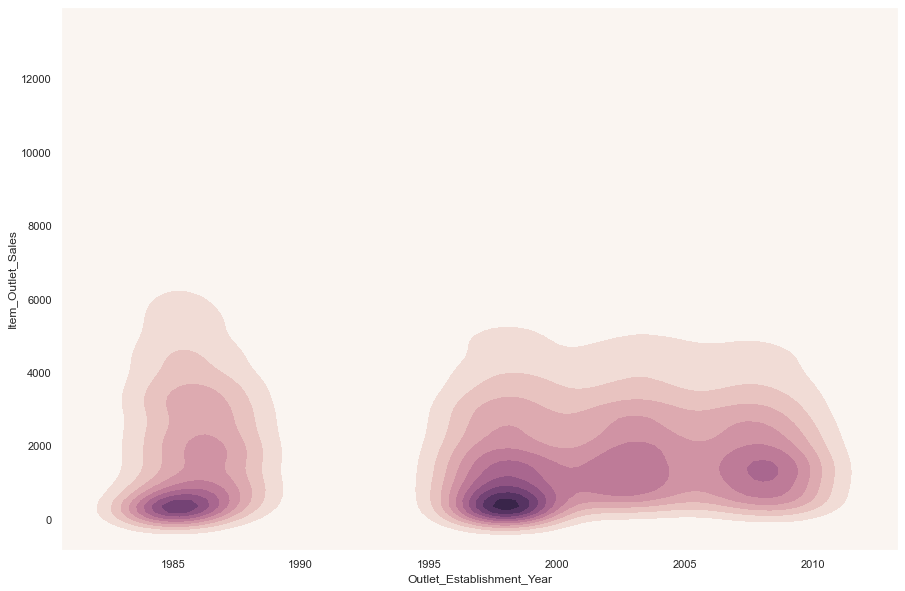

In [205]:
sb.kdeplot(bMart.Outlet_Establishment_Year, bMart.Item_Outlet_Sales, shade=True, cmap = cmap)